In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests as req
from bs4 import BeautifulSoup as bs
from selenium import webdriver as wb
from selenium.webdriver.common.keys import Keys
import time 
h = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.116 Safari/537.36"}
import os 
from urllib.request import urlretrieve
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

### 문제정의 (목표)
- iris (붓꽃)의 꽃잎 길이, 꽃잎 너비, 꽃받침 길이, 꽃받침 너비 특성들을 활용하여 3가지의 품종으로 분류해보자
- KNN 모델의 이웃(k)숫자를 조절해보자 (하이퍼파라미터 튜닝)

In [10]:
# 학습용 iris 데이터셋을 불러오기
from sklearn.datasets import load_iris

### 데이터 수집
- 학습용으로 제작된 데이터이기 때문에 iris 데이터를 바로 로드

In [11]:
iris_data = load_iris()
iris_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

### 데이터 전처리
- 학습용 데이터이기 때문에 전처리는 필요없음

### 탐색적 데이터 분석
- 데이터의 구조를 확인해보자!

In [12]:
iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [13]:
# 딕셔너리 내부 키 값
# data: 문제 데이터
# target: 정답 데이터
# target_names: 정답 데이터 명
# feature_names: 컬럼명
# DESCR: 데이터셋에 대한 설명
# filename: 파일 경로 및 이름

In [14]:
iris_data['data'] # iris_date.data로 해두됨

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [15]:
iris_data['target']
# 0: setosa, 1: versicolor, 2: virginica

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [16]:
print(iris_data['data'].shape)
print(iris_data['target'].shape)

(150, 4)
(150,)


In [17]:
iris_data['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [19]:
print(iris_data['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

- 데이터 프레임 형태로 문제 데이터를 변환! (컬럼명은 feature_names로 삽입)

In [20]:
iris_df=pd.DataFrame(iris_data['data'],columns=iris_data['feature_names'])

In [21]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


- 문제와 정답으로 분리

In [23]:
X= iris_df
y= iris_data['target']

In [24]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


- 학습, 평가 데이터 분리

In [25]:
# 학습데이터와 평가데이터를 랜덤으로 섞은 후 분리해주는 명령
from sklearn.model_selection import train_test_split

In [42]:
# train_test_split(문제, 정답, 평가데이터의 비율, 랜덤시드값 설정)
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size =0.3,
                                                   random_state = 32
                                                   )

In [43]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


In [44]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
117,7.7,3.8,6.7,2.2
73,6.1,2.8,4.7,1.2
97,6.2,2.9,4.3,1.3
63,6.1,2.9,4.7,1.4
49,5.0,3.3,1.4,0.2
...,...,...,...,...
88,5.6,3.0,4.1,1.3
124,6.7,3.3,5.7,2.1
54,6.5,2.8,4.6,1.5
133,6.3,2.8,5.1,1.5


- 시각화를 해보자!
- 한번에 여러 특성들을 비교할 수 있는 산점도 매트릭스를 활용해보자!

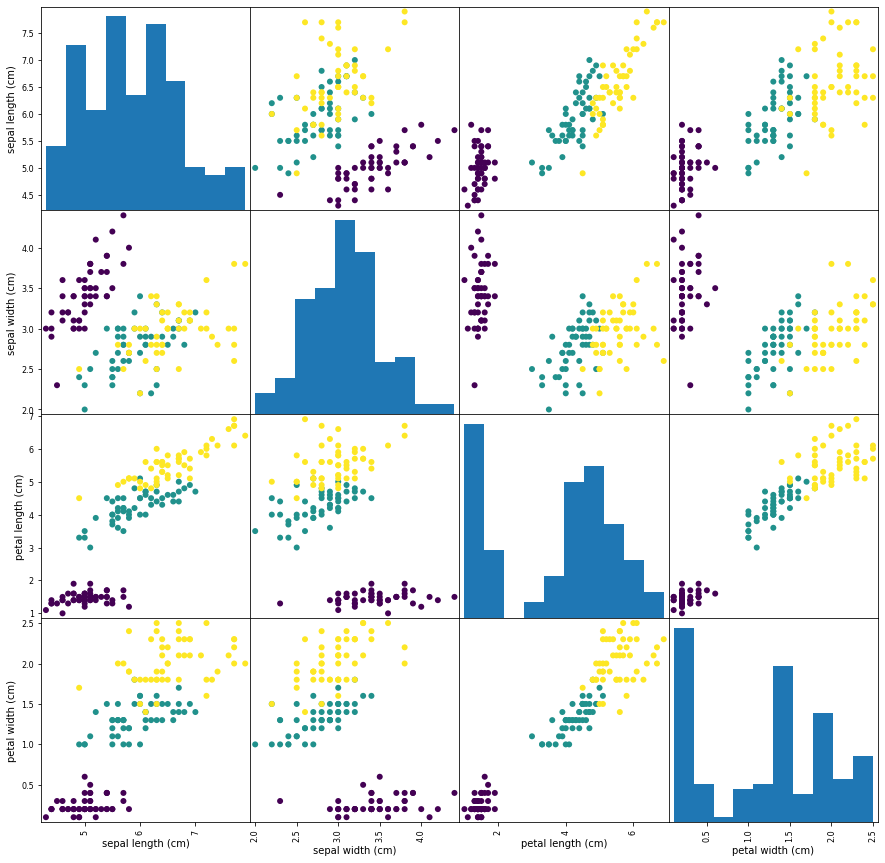

In [47]:
pd.plotting.scatter_matrix(iris_df,
                           # 매트릭스의 전체 사이즈를 설정
                           figsize =(15,15),
                           # 데이터의 모양 (o: 동그라미, s: 네모, ^: 세모)
                           marker ="o",
                           #데이터의 색상 설정
                           c= y, 
                           # 매트릭스의 투명도를 설정: 0(투명) ~1 (불투명)
                           alpha = 1
                          )
plt.show()

### 모델링 (모델선택, 학습, 평가)

In [78]:
### KNN 모델 불러오기
knn_model = KNeighborsClassifier(n_neighbors= 1)    #k값 == n_neighbors

In [79]:
knn_model

KNeighborsClassifier(n_neighbors=1)

In [80]:
knn_model.fit(X_train,y_train) 

KNeighborsClassifier(n_neighbors=1)

In [81]:
# 평가용 문제 데이터를 넣어서 정답을 예측
pre = knn_model.predict(X_test)
pre

array([1, 0, 0, 1, 2, 2, 0, 0, 1, 0, 1, 2, 1, 1, 2, 2, 1, 2, 1, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 0, 0, 1, 0, 0, 2, 1, 0, 0, 2, 2, 1, 0, 2, 0, 2,
       0])

In [82]:
# 정확도를 확인
metrics.accuracy_score(pre,y_test)

1.0

In [83]:
# 한번에 평가용 문제와 정답을 넣어서 바로 정확도를 확인해보자!
knn_model.score(X_test,y_test)

1.0

### 반복문을 활용하여 하이퍼파라미터 튜닝하기!

In [99]:
# for문을 활용하여 k값이 변화할때 train, test 데이터의 예측 정확도를 비교해보자!
train_list = []  # train 데이터의 정확도 값을 넣어줌
test_list =[]    # test 데이터의 정확도 값을 넣어줌

for k in range(1,100,2):
    # 모델 생성 및 하이퍼파리미터에 변수 넣기
    knn_model = KNeighborsClassifier(n_neighbors=k)
    #모델 학습
    knn_model.fit(X_train,y_train)
    
    # 학습한 모델로 예측 -> 정확도를 측정 -> 측정한 값을 빈 리스트에 담아주기!
    # 학습 데이터
    train_score=knn_model.score(X_train,y_train)
    train_list.append(train_score)
    #평가 데이터
    test_score = knn_model.score(X_test,y_test)
    test_list.append(test_score)

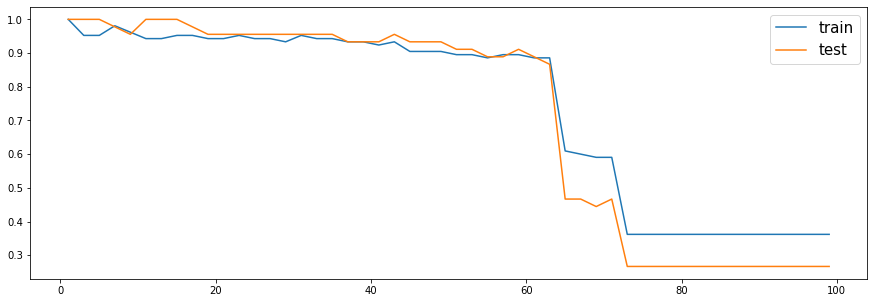

In [101]:
# 그래프로 표현해보자!
plt.figure(figsize=(15,5))
plt.plot(range(1,100,2), train_list, label ='train')
plt.plot(range(1,100,2), test_list, label ='test')
# loc: 범례의 위치를 표시 (upper, center, lower), (left, center, right)
# prop: 범례의 크기를 설정
plt.legend(loc='upper right', prop = {'size':15})
plt.show()

- knn 모델의 이웃수 (n_neighbors)가 너무 많으면 예측성능이 떨어질 수 있음
- train 데이터의 정확도가 낮다면 -> 과소적합 (학습이 잘 이루어지지 않았음)
- train 데이터의 정확도가 높지만 test 데이터의 정확도가 낮다면 -> 과대적합
- test 데이터의 정확도는 train 데이터와의 차이를 보고 판단해야함
- -> 그래프에서 train 데이터의 정확도와 test 데이터의 정확도의 차이가 가장 적은 곳이 일반화가 잘된 부분